In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def f(x, y):
    return (x-2)*(x-1)*(x+1)*(x+2) + (y-2)*(y-1)*(y+1)*(y+2) + 9/2
def f_(x, y):
    return np.array([4*x**3 - 10*x, 4*y**3 - 10 * y]) 

np.random.seed(42)
x_range = [-2, 2]
y_range = [-2, 2]
levels = 15
initial_guesses = [np.array([x_range[0] + np.random.rand()*(x_range[1]-x_range[0]),
                   y_range[0] + np.random.rand()*(y_range[1]-y_range[0])]) for i in range(20)]

In [3]:
mesh_steps = 100
X, Y = np.meshgrid(np.linspace(x_range[0], x_range[1], mesh_steps), np.linspace(y_range[0], y_range[1], mesh_steps))
VALUE = f(X, Y)

def plot_contour():
    CS = plt.contour(X, Y, VALUE, levels=levels)
    plt.clabel(CS, inline=1)

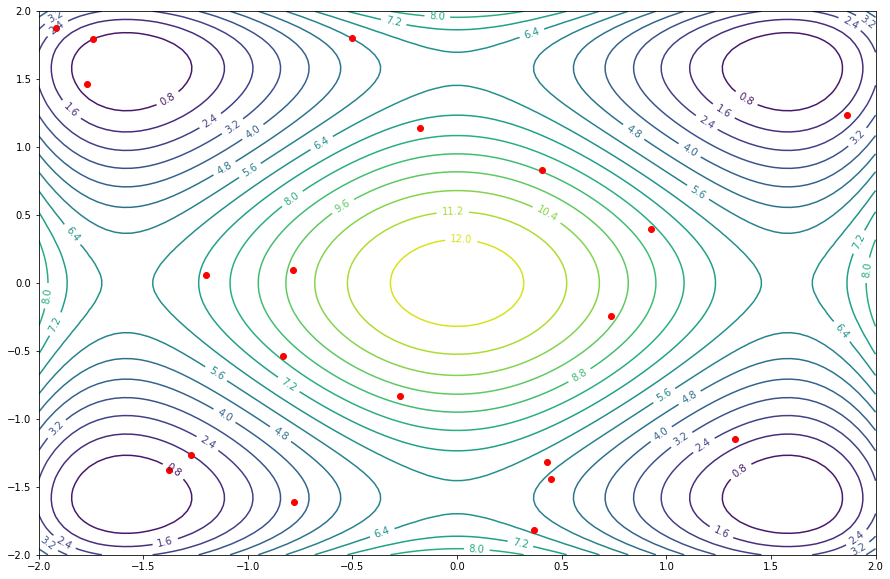

In [4]:
plot_contour()
points = np.array(initial_guesses)
plt.plot(points[:,0], points[:,1], 'ro')
plt.show()

In [5]:
def gradient_descend(initial_guess, max_steps=200, stepsize=0.1, eps=1e-3):
    points = [initial_guess]
    x,y = initial_guess
    for i in range(max_steps):
        if f(x,y) < eps:
            return np.array(points)
        x,y = np.array([x,y]) - stepsize*f_(x,y)/np.linalg.norm(f_(x,y))
        points.append(np.array([x,y]))
    
    points = np.array(points)
    return points

Steps: 114
x:  [-1.58108849  1.5811377 ]
Error: 2.5356460042758044e-08

Steps: 142
x:  [1.58067829 1.57718237]
Error: 0.00015826451886535864

Steps: 30
x:  [-1.58103459 -1.58103468]
Error: 2.171004620521444e-07

Steps: 23
x:  [-1.58151531  1.58072612]
Error: 3.1205640169673643e-06

Steps: 145
x:  [1.57514841 1.58011045]
Error: 0.00036806138958667134

Steps: 45
x:  [-1.58840678  1.58778945]
Error: 0.0009748323340854625

Steps: 50
x:  [ 1.57727247 -1.57268429]
Error: 0.0008600981709525612

Steps: 45
x:  [-1.58065901 -1.58064359]
Error: 4.753460009609967e-06

Steps: 197
x:  [-1.5811156   1.57881937]
Error: 5.372528346025973e-05

Steps: 162
x:  [-1.57625634 -1.58078774]
Error: 0.00023888424104345773

Steps: 116
x:  [ 1.57927448 -1.58111044]
Error: 3.4724995503054856e-05

Steps: 131
x:  [-1.57862333 -1.57340885]
Error: 0.0006577851868225792

Steps: 161
x:  [-1.58041105  1.58113252]
Error: 5.294573327319085e-06

Steps: 178
x:  [-1.58113767  1.57937641]
Error: 3.102648032715649e-05

Steps: 12

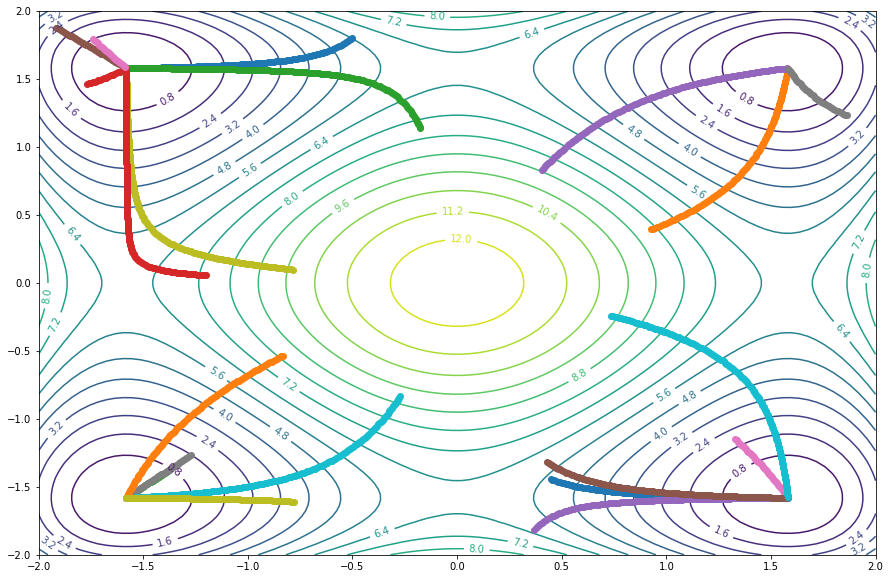

In [10]:
plot_contour()

max_steps = 500
stepsize = 0.01
eps = 1e-3

for initial_guess in initial_guesses:
    points = gradient_descend(initial_guess, max_steps, stepsize, eps)
    print("Steps:", len(points))
    print("x: ", points[-1])
    print("Error:", f(points[-1][0], points[-1][1]))
    print()
    plt.plot(points[:,0], points[:,1], 'o-')
plt.show()